In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.corpus import movie_reviews
print(movie_reviews.fileids())

['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv041_22364.txt', 'neg/cv042_11927.txt', 'neg/cv043_16808.t

In [6]:
len(movie_reviews.fileids())

2000

In [10]:
movie_reviews.words('pos/cv895_21022.txt')

['the', 'soldiers', 'of', 'three', 'kings', 'have', ...]

In [11]:
complete_paragraph = ' '.join(movie_reviews.words('pos/cv895_21022.txt'))
complete_paragraph

'the soldiers of three kings have taken their cue from movies about vietnam . ( fitting , since the media - saturated gulf war became a pop entertainment . ) while driving through a long , flat iraqi desert ( in a humvee with a bart simpson hood ornament ) , one of the men under special forces sgt . maj . archie gates \' ( who \' s steering ) command requests a beach boys tune . these men want their apocalypse now moment , only instead of surfing , they bop to the music and skeet shoot out the back of the vehicle , armed with automatic rifles . our three kings ( okay , four ) are good fighters , but they don \' t necessarily take operation desert storm seriously - it \' s a reprieve from their hellish day jobs . they are gates , new father sgt . troy barlow ( wahlberg ) , sgt . chief elgin ( cube ) , and pvt . conrad vig ( music video director jonze ) . at story \' s start , president bush has declared a ceasefire , and american troops are tying up loose ends . barlow , elgin , and vig

In [161]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [162]:
print(set(stopwords.words('english')))

{'these', "you'll", 'wouldn', 's', 'out', "isn't", 'here', 'own', "that'll", 'ain', 'below', 'few', 'when', 'herself', 'hers', 'for', 'haven', 'do', 'himself', 'during', 'in', 'only', 'didn', "hasn't", 'above', 'y', 'shouldn', 'she', 'as', "mustn't", 'wasn', 'and', 'isn', 'its', 'couldn', "hadn't", 'over', 'once', 'so', 'itself', 'against', 'who', 'aren', 'doesn', 'those', 'if', 'he', 'd', 'hadn', 'or', "mightn't", 'themselves', "doesn't", 'will', "you're", 'all', 'shan', 'are', 'can', "it's", 'you', "shouldn't", 'until', 'of', "haven't", 'doing', "shan't", 'to', 'most', "couldn't", 'with', 'after', 'yours', 'was', 'me', "aren't", 'won', 'is', 'into', 'just', 'from', 'how', 'what', 't', 'i', 'needn', 'nor', 'same', 'by', 'a', 'yourself', 'more', 'which', 'that', 'am', "didn't", "don't", 'but', "you've", 'such', 'should', 'yourselves', 'no', 'this', 'her', 'through', 'the', 'both', 'ours', 'whom', 'than', 'being', 'had', 'very', 'll', 'now', 'be', 'ma', 'their', 'they', 'about', 'have',

In [163]:
def clean_text(text):
    text = nltk.sent_tokenize(text)
    for i in range(len(text)):
        text[i] = text[i].lower()
        text[i] = text[i].replace(r',', ' ')
        text[i] = text[i].replace(r" \' s", 's')
        text[i] = re.sub(r"[^a-zA-Z]",' ',text[i])
        text[i] = ' '.join([word for word in text[i].split() if word.lower() not in set(stopwords.words('english'))])
        text[i] = ' '.join([WordNetLemmatizer().lemmatize(word) for word in text[i].split()])
        #text[i] = ' '.join([PorterStemmer().stem(word) for word in text[i].split()])
    return text

In [164]:
processed_paragraph = ' '.join(clean_text(complete_paragraph)).replace("  ","")

In [165]:
processed_paragraph

'soldier three king taken cue movie vietnam fitting since medium saturated gulf war became pop entertainment driving long flat iraqi desert humvee bart simpson hood ornament one men special force sgt maj archie gate steering command request beach boy tune men want apocalypse moment instead surfing bop music skeet shoot back vehicle armed automatic rifle three king okay four good fighter necessarily take operation desert storm seriously reprieve hellish day job gate new father sgt troy barlow wahlberg sgt chief elgin cube pvt conrad vig music video director jonze story start president bush declared ceasefire american troop tying loose end barlow elgin vig discover round iraqi captive as map point bunker filled gold bullion gate leaf jurisdiction commandeer situation proposes demand barlow elgin vig join treasure hunt ditching escort relentless reporter named adriana cruz nora dunn easy finding treasure four men realize magnitude discord still breathing iraq saddam men threatening dictat

In [166]:
print(nltk.word_tokenize(processed_paragraph))

['soldier', 'three', 'king', 'taken', 'cue', 'movie', 'vietnam', 'fitting', 'since', 'medium', 'saturated', 'gulf', 'war', 'became', 'pop', 'entertainment', 'driving', 'long', 'flat', 'iraqi', 'desert', 'humvee', 'bart', 'simpson', 'hood', 'ornament', 'one', 'men', 'special', 'force', 'sgt', 'maj', 'archie', 'gate', 'steering', 'command', 'request', 'beach', 'boy', 'tune', 'men', 'want', 'apocalypse', 'moment', 'instead', 'surfing', 'bop', 'music', 'skeet', 'shoot', 'back', 'vehicle', 'armed', 'automatic', 'rifle', 'three', 'king', 'okay', 'four', 'good', 'fighter', 'necessarily', 'take', 'operation', 'desert', 'storm', 'seriously', 'reprieve', 'hellish', 'day', 'job', 'gate', 'new', 'father', 'sgt', 'troy', 'barlow', 'wahlberg', 'sgt', 'chief', 'elgin', 'cube', 'pvt', 'conrad', 'vig', 'music', 'video', 'director', 'jonze', 'story', 'start', 'president', 'bush', 'declared', 'ceasefire', 'american', 'troop', 'tying', 'loose', 'end', 'barlow', 'elgin', 'vig', 'discover', 'round', 'iraqi'

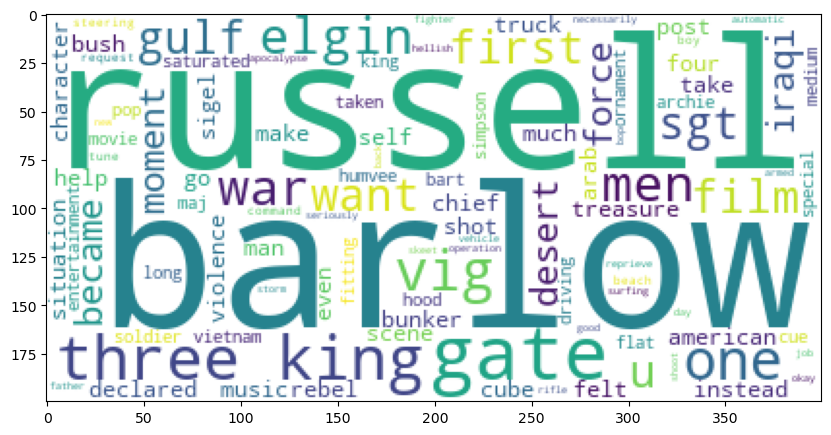

In [167]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, background_color='white')
wc.generate(processed_paragraph)
plt.figure(figsize=(10,6))
plt.imshow(wc)